# S OF E

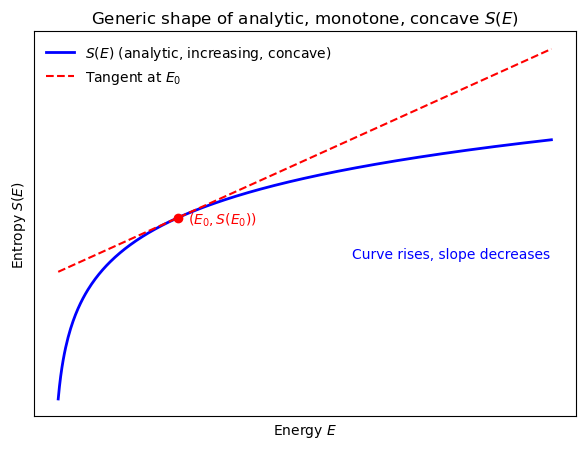

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Energy axis
E = np.linspace(0.1, 10, 400)

# Example analytic, increasing, concave entropy function: logarithm + constant
S = np.log(E) + 2  

# Plot
plt.figure(figsize=(7,5))
plt.plot(E, S, label=r"$S(E)$ (analytic, increasing, concave)", color="blue", lw=2)

# Tangent line at a chosen point
E0 = 2.5
S0 = np.log(E0) + 2
slope = 1/E0  # derivative of log(E) at E0
tangent = S0 + slope*(E - E0)
plt.plot(E, tangent, '--', color="red", lw=1.5, label="Tangent at $E_0$")

# Annotations
plt.scatter([E0],[S0], color="red", zorder=5)
plt.text(E0+0.2, S0-0.1, r"$(E_0,S(E_0))$", color="red")
plt.text(6, 2.2, "Curve rises, slope decreases", fontsize=10, color="blue")

plt.xticks([])
plt.yticks([])

plt.xlabel(r"Energy $E$")
plt.ylabel(r"Entropy $S(E)$")
plt.title("Generic shape of analytic, monotone, concave $S(E)$")
plt.legend(frameon=False)
plt.savefig("01_S_of_E.svg")

# E OF S

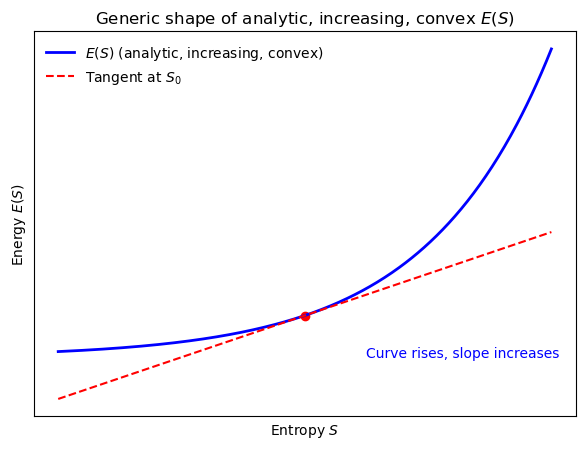

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define S(E) = log(E) + 2  => E(S) = exp(S - 2)
S = np.linspace(0.5, 4.5, 400)
E = np.exp(S - 2)

# Tangent at a point S0
S0 = 2.5
E0 = np.exp(S0 - 2)
# dE/dS = T = 1 / (dS/dE) = 1 / (1/E) = E, for this model; more generally dE/dS = T
slope = E0  # here equals E0
tangent = E0 + slope*(S - S0)

plt.figure(figsize=(7,5))
plt.xticks([])
plt.yticks([])
plt.plot(S, E, lw=2, label=r"$E(S)$ (analytic, increasing, convex)", color='b')
plt.plot(S, tangent, '--', lw=1.5, label="Tangent at $S_0$", color='r')
plt.scatter([S0],[E0], color='r')
plt.xlabel(r"Entropy $S$")
plt.ylabel(r"Energy $E(S)$")
plt.text(3, 0, "Curve rises, slope increases", fontsize=10, color="blue")
plt.title(r"Generic shape of analytic, increasing, convex $E(S)$")
plt.legend(frameon=False)
plt.savefig("02_E_of_S.svg")

# PHASE TRANSITION

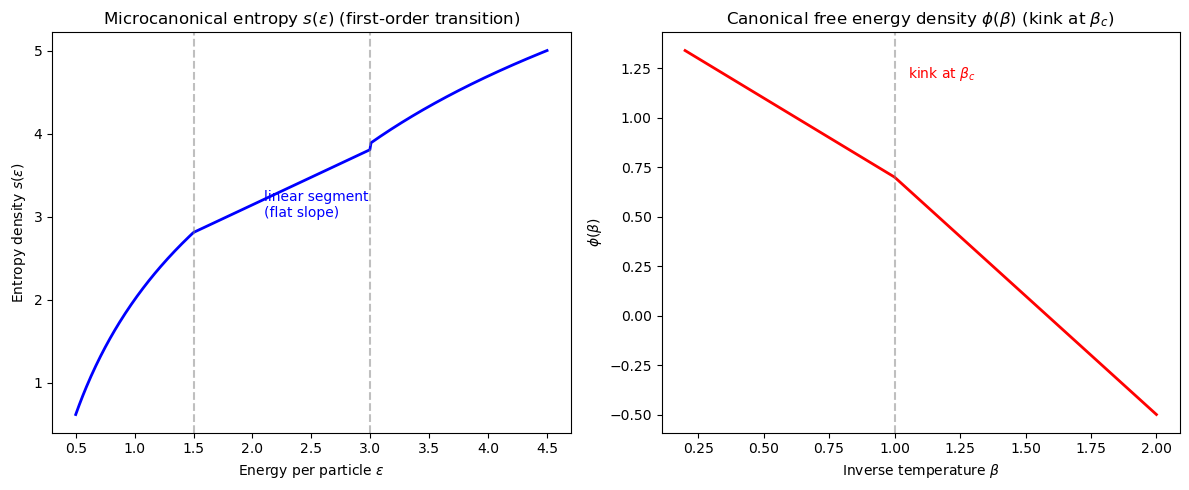

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Example entropy density s(ε) for first-order transition:
eps1, eps2 = 1.5, 3.0
eps = np.linspace(0.5, 4.5, 400)

# Piecewise definition: log-like for low and high energies, linear segment in between
s = np.piecewise(eps,
                 [eps < eps1, (eps >= eps1) & (eps <= eps2), eps > eps2],
                 [lambda e: 2*np.log(e)+2,
                  lambda e: (2*np.log(eps1)+2) + (1.0/1.5)* (e-eps1), # constant slope region
                  lambda e: 2*np.log(e-1)+2.5])

# Plot s(ε)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(eps, s, lw=2, color="blue")
plt.title(r"Microcanonical entropy $s(\varepsilon)$ (first-order transition)")
plt.xlabel(r"Energy per particle $\varepsilon$")
plt.ylabel(r"Entropy density $s(\varepsilon)$")
plt.axvline(eps1, color="gray", ls="--", alpha=0.5)
plt.axvline(eps2, color="gray", ls="--", alpha=0.5)
plt.text(2.1, 3.0, "linear segment\n(flat slope)", color="blue")

# Example φ(β) for canonical free energy density: convex with kink
beta = np.linspace(0.2, 2.0, 400)
phi = np.where(beta < 1.0, -0.8*beta+1.5, -1.2*beta+1.9)

plt.subplot(1,2,2)
plt.plot(beta, phi, lw=2, color="red")
plt.title(r"Canonical free energy density $\phi(\beta)$ (kink at $\beta_c$)")
plt.xlabel(r"Inverse temperature $\beta$")
plt.ylabel(r"$\phi(\beta)$")
plt.axvline(1.0, color="gray", ls="--", alpha=0.5)
plt.text(1.05, 1.2, "kink at $\\beta_c$", color="red")

plt.tight_layout()
plt.savefig("03_first_order_phase_transition.svg")